In [122]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
DIR = 'mc_results'
names = []
names_f = []
for i in os.listdir(DIR):
    if '.csv' in i and '_t1000_' in i:
        names.append(i)
        names_f.append(i.split('_')[4] + '_' + i.split('_')[3])

In [59]:
names,names_f

(['generate_data_mc100_m20_i100_e10000_t1000_lr1.0.csv',
  'generate_data_mc100_m50_i300_e10000_t1000_lr1.0.csv',
  'generate_data_mc100_m100_i100_e10000_t1000_lr1.0.csv'],
 ['i100_m20', 'i300_m50', 'i100_m100'])

In [60]:
dfs = {j: pd.read_csv(os.path.join(DIR,i),index_col=0) for i,j in zip(names,names_f)}

In [68]:
dfs['i100_m20'].columns[-2:]

Index(['aj_sign_changed', 'time_stamp'], dtype='object')

In [69]:
multiId = []
for i in names_f:
    for j in dfs[i].columns[(-2):]:
        multiId.append((i,j))
multiId

[('i100_m20', 'aj_sign_changed'),
 ('i100_m20', 'time_stamp'),
 ('i300_m50', 'aj_sign_changed'),
 ('i300_m50', 'time_stamp'),
 ('i100_m100', 'aj_sign_changed'),
 ('i100_m100', 'time_stamp')]

In [87]:
iterables = [names_f, ["aj_sign_changed", "time_stamp"]]

mi = pd.MultiIndex.from_product(iterables, names=["base", "var"])

data = pd.DataFrame(columns=mi)
data

Empty DataFrame
Columns: [(i100_m20, aj_sign_changed), (i100_m20, time_stamp), (i300_m50, aj_sign_changed), (i300_m50, time_stamp), (i100_m100, aj_sign_changed), (i100_m100, time_stamp)]
Index: []

In [90]:
for i in names_f:
    print('{}'.format(''.join(['-']*20)))
    print(i)
    data[(i,'time_stamp')] = dfs[i].time_stamp
    data[(i,'aj_sign_changed')] = dfs[i].aj_sign_changed
    print('aj_sign_changed_av: ',dfs[i].aj_sign_changed.mean())
    print('time_stamp_av: ',dfs[i].time_stamp.mean())
    print()

--------------------
i100_m20
aj_sign_changed_av:  0.0659
time_stamp_av:  66.3549026799202

--------------------
i300_m50
aj_sign_changed_av:  0.04269999999999995
time_stamp_av:  79.92958419561386

--------------------
i100_m100
aj_sign_changed_av:  0.044099999999999986
time_stamp_av:  72.96315476894378



In [107]:
for i in range(1,4):
    print(i)

1
2
3


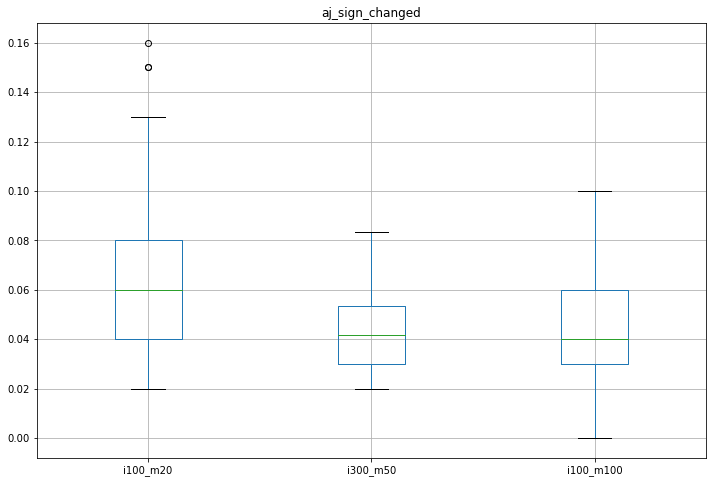

In [143]:
new_data = data.iloc[:,[i for i in range(0,6) if i%2 == 0]].copy()
plt.figure(figsize=(12,8))
new_data.boxplot()
plt.xticks(range(1,4), [i[0] for i in new_data.columns])
plt.title(new_data.columns[0][1])
plt.show()

In [146]:
new_data[new_data[('i100_m20','aj_sign_changed')] > 0.14]

base,i100_m20,i300_m50,i100_m100
var,aj_sign_changed,aj_sign_changed,aj_sign_changed
30,0.16,0.063333,0.04
41,0.15,0.050000,0.02
91,0.15,0.033333,0.05


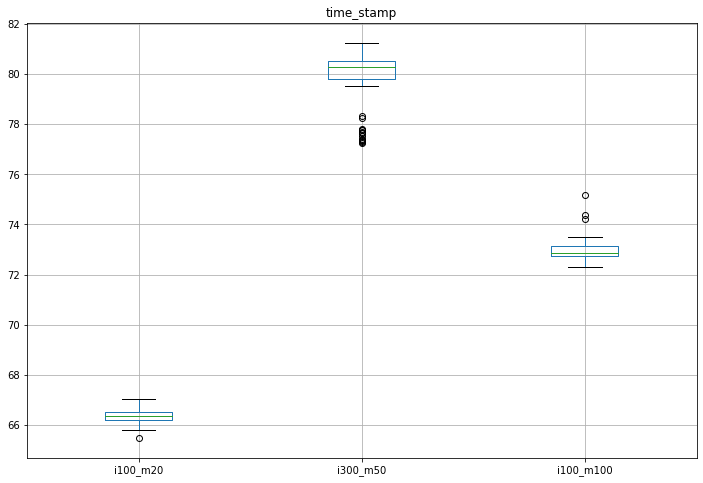

In [128]:
new_data = data.iloc[:,[i for i in range(0,6) if i%2 != 0]].copy()
plt.figure(figsize=(12,8))
new_data.boxplot()
plt.xticks(range(1,4), [i[0] for i in new_data.columns])
plt.title(new_data.columns[0][1])
plt.show()

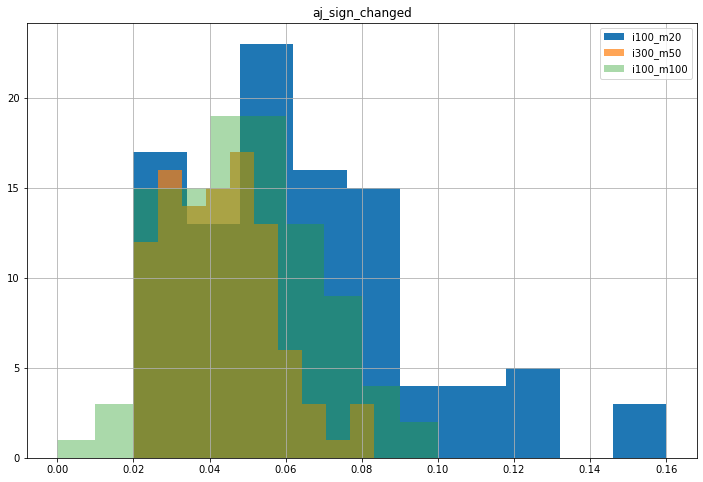

In [142]:
new_data = data.iloc[:,[i for i in range(0,6) if i%2 == 0]].copy()
plt.figure(figsize=(12,8))
a = 1
for i in new_data.columns:
    plt.hist(new_data[i],alpha=a)
    a-=0.3
plt.legend(labels=[i[0] for i in new_data.columns],
          loc='best')
plt.title(new_data.columns[0][1])
plt.grid()
plt.show()

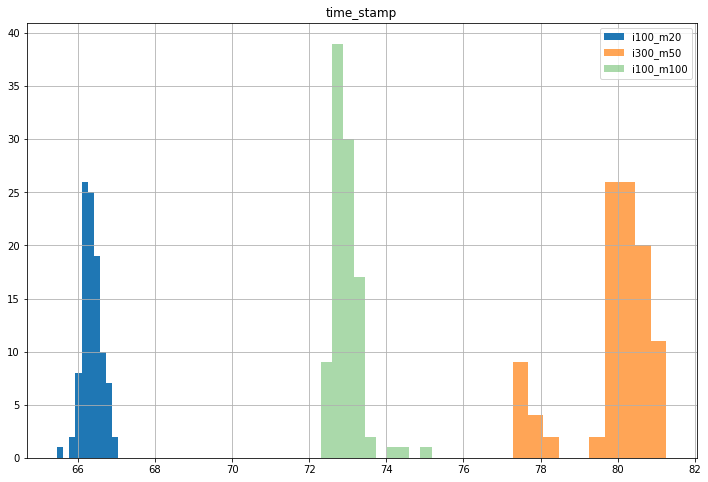

In [141]:
new_data = data.iloc[:,[i for i in range(0,6) if i%2 != 0]].copy()
plt.figure(figsize=(12,8))
a = 1
for i in new_data.columns:
    plt.hist(new_data[i],alpha=a)
    a-=0.3
plt.legend(labels=[i[0] for i in new_data.columns],
          loc='best')
plt.title(new_data.columns[0][1])
plt.grid()
plt.show()